In [13]:
%matplotlib inline
import numpy as np
import scipy.constants as const 
phi_gold =const.golden_ratio # Optional
import matplotlib.pyplot as plt
import matplotlib

from classy import Class

In [14]:
# Optional
font = {'size'   : 18, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)

In [28]:
# LCDM
lcdm = Class()

# This is where to input parameters
lcdm.set({'Omega_b':0.05, 'Omega_cdm':0.26})
lcdm.compute()


In [18]:
c_in_kmps = const.c/1000 # speed of light in km/s
H0_1_over_Mpc = lcdm.Hubble(0) # call Hubble constant (in unit of Mpc^{-1}) at redshift 0 
# -----------------------------------------------
# Note: To recover the Hubble constant in km/s/Mpc,
# multiplying H_1_over_Mpc with the speed of light (km/s)
H0 = H0_1_over_Mpc*c_in_kmps 

# -----------------------------------------------
c_over_H0 = 1./H0_1_over_Mpc # c/H0 in Mpc

In [19]:
# Get background quantities
bg_lcdm = lcdm.get_background()

In [21]:
bg_lcdm.keys()

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])

In [29]:

# store background quantities in new variables
z_list = bg_lcdm['z']
dist_names = ['lum. dist.', 'comov. dist.', 'ang.diam.dist']
lcdm_d_L = bg_lcdm['lum. dist.']
lcdm_com = bg_lcdm['comov. dist.']
lcdm_d_A = bg_lcdm['ang.diam.dist.']
lcdm_distances = [lcdm_d_L, lcdm_com, lcdm_d_A]

# You may have empty the input parameters if one wants other cosmolical models
lcdm.empty()
# Clean up memory used in running
lcdm.struct_cleanup()

In [30]:
# Einstein-de Sitter
EdS = Class()
EdS.set({'Omega_b':0.05, 'Omega_cdm':0.95})
EdS.compute()

# store background quantities in variables
bg_EdS = EdS.get_background()
z_list = bg_EdS['z']
dist_names = ['lum. dist.', 'comov. dist.', 'ang.diam.dist']
EdS_d_L = bg_EdS['lum. dist.']
EdS_com = bg_EdS['comov. dist.']
EdS_d_A = bg_EdS['ang.diam.dist.']
EdS_distances = [EdS_d_L, EdS_com, EdS_d_A]

EdS.empty()
EdS.struct_cleanup()

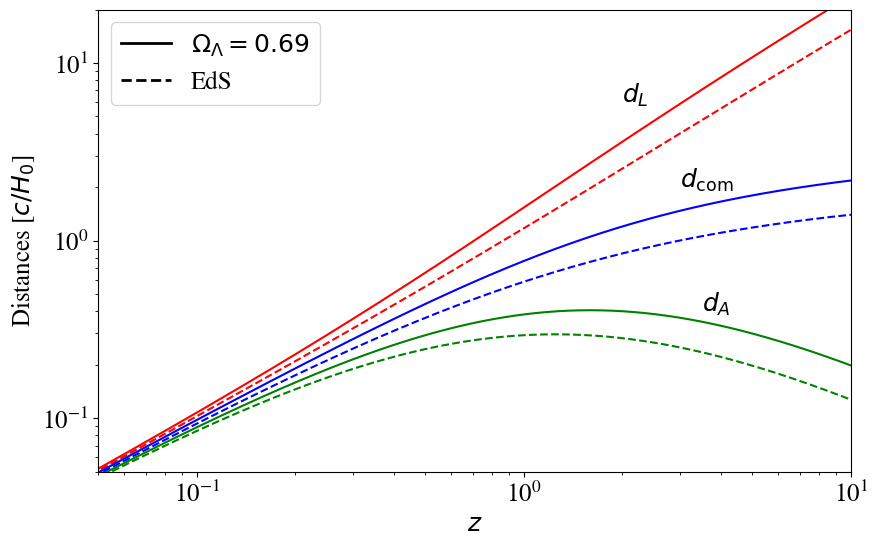

In [31]:
# Plotting
from matplotlib.lines import Line2D # this library is for creating 2D lines
cl = ['r','b','g'] # color: red, blue, green

fig, ax = plt.subplots(figsize=(6*phi_gold, 6))
# loop over three types of distances
for i in range(3):
    # with Lambda
    ax.loglog(z_list, lcdm_distances[i]/c_over_H0, color=cl[i], label=r'$\Lambda\mathrm{CDM}$, $O_\Lambda=0.69$')
    # EdS
    ax.loglog(z_list, EdS_distances[i]/c_over_H0, ls = '--', color=cl[i], label=r'EdS')

plt.xlim(0.05,10)
plt.ylim(0.05,20)
plt.xlabel('$z$')
plt.ylabel(r'Distances [$c/H_0$]')
plt.text(2, 6, r'$d_L$')
plt.text(3, 2, r'$d_\text{com}$')
plt.text(3.5, 0.4, r'$d_A$')

# customise plot legend
custom_lines = [Line2D([0], [0], color='k', lw=2),
                Line2D([0], [0], color='k', lw=2, ls='--')]
plt.legend(custom_lines, [r'$\Omega_\Lambda=0.69$', 'EdS'])
plt.show()
# plt.savefig('bg_distances.pdf') # comment in if you want to export the plot